# Final Project 

#### Please note, due to memory constraints we are using a 70% randomised and representative sample of the full data set for our analyses and visualisations. This subet was created in a previous exercise. 

This notebook focuses on customer profiling based on demographics and purchasing behaviour. 

###  Contents:

1. Importing libraries and files

2. Creating profiling variables to look at customer behaviour
    1. Age
    2. Income
    3. Family status
    
3. Customer purchasing by department (looking at customer behaviour)
    1. Alcohol drinkers
    2. Pet owners
    3. Time of day ordered
    4. Age and day of week ordered
    
3. Creating customer profiling visualisations

4. Exporting updated dataframes and charts
    
   ** **

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create usable path 
path = r'C:\Users\rutha\CareerFoundry\01-23_Instacart_Basket_Analysis'

In [3]:
#importing previously created high activity data set 
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'high_activity_customers.pkl'))

In [4]:
#checking output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,age,date_joined,n_dependants,dependants_loc,fam_status,income,region,exclusion_flag
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
5,2398795,1,2,3,7,15.0,196,1,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
7,2398795,1,2,3,7,15.0,12427,3,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
8,2398795,1,2,3,7,15.0,13176,4,0,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21695423 entries, 1 to 32435058
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int16         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   _merge                  category      
 10  product_name            object        
 11  aisle_id                float16       
 12  department_id           float16       
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int8          
 18  

In [6]:
df.shape

(21695423, 33)

In [7]:
#importing departments data set 
df_deps = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'departments_wrangled.csv'), index_col = False)

In [8]:
#checking output 
df_deps

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
df_deps.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [10]:
#checking output
df_deps

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 2. Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. We need to create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

**What are demographics are we going to be looking at?**
 - Age
 - Income
 - Family status and dependants 


### 2.1 Age

Creating a flag which groups customers into one of three categories based on their age: youth, middle age, or senior. 

In [11]:
#checking the variance of ages in our dataset
df['age'].describe()

count    2.169542e+07
mean     4.946534e+01
std      1.848656e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

**Result:** The result of the describe function() is that we have a wide spread of ages, all customers are adults. The minimum age is 18 whilst the maximum is 81 so it makes sense to group the age into three categories:

1. Youth: 18 - 39
2. Midde age: 40 - 64
3. Senior: 65+

In [12]:
#creating age categories

df.loc[(df['age'] >= 18) & (df['age'] < 40), 'age_category'] = 'Youth'
df.loc[(df['age'] >= 40) & (df['age'] < 65), 'age_category'] = 'Middle age'
df.loc[df['age'] >= 65, 'age_category'] = 'Senior'
df['age_category'].value_counts()

Middle age    8478701
Youth         7474436
Senior        5742286
Name: age_category, dtype: int64

In [13]:
#checking shape of dataset
df.shape

(21695423, 34)

### 2.2 Income

Creating a flag which groups customers into one of three categories based on their income: high, middle, or low income.

In [14]:
#checking our dataframe for income statistics
df['income'].describe()

count    2.169542e+07
mean     9.966743e+04
std      4.313213e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676300e+04
75%      1.281000e+05
max      5.939010e+05
Name: income, dtype: float64

**Result:** The results of the describe function tell us that the lowest recorded income is 25,000 USD and the highest is 593,901 USD

Text(0.5, 1.0, 'Income distribution of Instacart Users')

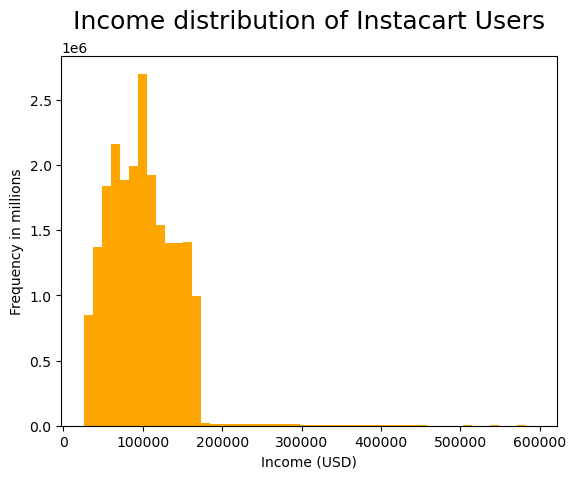

In [15]:
#create an income histogram
hist_income = df['income'].plot.hist(bins =50, color = 'orange')

plt.xlabel('Income (USD)')
plt.ylabel('Frequency in millions')
plt.title('Income distribution of Instacart Users', fontsize = 18, pad=20)

In [16]:
#calculating the income percentiles
quartile_income = list(df['income'].quantile([0.25, 0.5, 0.75]))

In [17]:
#checking results
quartile_income

[67289.0, 96763.0, 128100.0]

**Results:** based on the identified quartiles, we are going to create three income categories so we can analyse the impact of income on purchases: low, mid, and high income. 

In [18]:
# Creating income_category column

df.loc[df['income']< 70000, 'income_flag'] = 'Low'
df.loc[(df['income']>= 70000) & (df['income']< 120000), 'income_flag'] = 'Middle'
df.loc[df['income']>= 120000, 'income_flag'] = 'High'

In [19]:
df['income_flag'].value_counts()

Middle    9292186
High      6431435
Low       5971802
Name: income_flag, dtype: int64

In [20]:
# Drawing a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (df['region'],df['income_flag'], dropna = False)
crosstab_income_region

income_flag,High,Low,Middle
region,,,
Midwest,1533594,1382842,2169883
Northeast,1142320,1042490,1645275
South,2117335,1997383,3109416
West,1638186,1549087,2367612


### 2.3 Family makeup and Number of Depedants

In a previous exercise we created the column *dependants_loc* which tracked whether or not the customer has any dependants. We can use this data point in conjunction with others to understand more about how having dependants impacts purchasing. 

It's not clear from the data set but dependants can be children or adults, including elderly relevatives, or family members with disabilities. 

In [21]:
#comparing family status with whether they have dependants
family_crosstab = pd.crosstab(df['fam_status'],df['dependants_loc'],dropna = False)

In [22]:
#checking output
family_crosstab

dependants_loc,Has dependants,No dependants
fam_status,,
divorced/widowed,0,1853335
living with parents and siblings,1037870,0
married,15233343,0
single,0,3570875


**Observations:** It appears that only those customers who are married, or live with close family members have dependants. 

#### Creating a profile column that looks at income and family status

In [23]:
#creating profile for "high-income single adult"
df.loc[(df['fam_status'] == 'single') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income single adult'

In [24]:
#creating profile for "mid-income single adult"
df.loc[(df['fam_status'] == 'single') & (df['income']>= 96763) & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income single adult'

In [25]:
#creating profile for "low-income single adult"
df.loc[(df['fam_status'] == 'single') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income single adult'

In [26]:
#creating profile for "high-income married adult"
df.loc[(df['fam_status'] == 'married') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income married adult'

In [27]:
#creating profile for "mid-income married adult"
df.loc[(df['fam_status'] == 'married') & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income married adult'

In [28]:
#creating profile for "low-income married adult"
df.loc[(df['fam_status'] == 'married') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income married adult'

In [29]:
#creating profile for "high-income divorced/widowed adult"
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income divored/widowed adult'

In [30]:
#creating profile for "mid-income divorced/widowed adult"
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income divorced/widowed adult'

In [31]:
#creating profile for "low-income divorced/widowed adult"
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income divorced/widowed adult'

In [32]:
#creating profile for "high-income cohabiting adult"
df.loc[(df['fam_status'] == 'living with parents or siblings') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income living with family adult'

In [33]:
#creating profile for "mid-income cohabiting adult"
df.loc[(df['fam_status'] == 'living with parents or siblings') & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income living with family adult'

In [34]:
#creating profile for "low-income cohabiting adult"
df.loc[(df['fam_status'] == 'living with parents or siblings') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income living with family adult'

In [35]:
# labelling everyone else as "other"
df['profile_age'] = df['profile_age'].fillna('other')

In [36]:
df['profile_age'].value_counts(dropna = False)

mid-income married adult             6482977
high-income married adult            4792623
low-income married adult             3957743
other                                2001821
low-income single adult              1248248
high-income divored/widowed adult     850162
high-income single adult              775966
mid-income divorced/widowed adult     756680
mid-income single adult               582710
low-income divorced/widowed adult     246493
Name: profile_age, dtype: int64

#### Creating a column that looks at income and dependants

In [37]:
#creating profile for "high-income family"
df.loc[(df['dependants_loc'] == 'Has dependants') & (df['income_flag'] == 'High'), 'profile_fam'] = 'high-income family'

In [38]:
#creating profile for "mid-income family"
df.loc[(df['dependants_loc'] == 'Has dependants') & (df['income_flag'] == 'Middle'), 'profile_fam'] = 'mid-income family'

In [39]:
#creating profile for "low-income family"
df.loc[(df['dependants_loc'] == 'Has dependants') & (df['income_flag'] == 'Low'), 'profile_fam'] = 'low-income family'

In [40]:
#creating profile for "high-income no dependants"
df.loc[(df['dependants_loc'] == 'No dependants') & (df['income_flag'] == 'High'), 'profile_fam'] = 'high-income no dependants'

In [41]:
#creating profile for "mid-income no dependants"
df.loc[(df['dependants_loc'] == 'No dependants') & (df['income_flag'] == 'Middle'), 'profile_fam'] = 'mid-income no dependants'

In [42]:
#creating profile for "low-income no dependants"
df.loc[(df['dependants_loc'] == 'No dependants') & (df['income_flag'] == 'Low'), 'profile_fam'] = 'low-income no dependants'

In [43]:
df['profile_fam'].value_counts(dropna = False)

mid-income family            6988845
high-income family           4805307
low-income family            4477061
mid-income no dependants     2303341
high-income no dependants    1626128
low-income no dependants     1494741
Name: profile_fam, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'mid-income family'),
  Text(1, 0, 'high-income family'),
  Text(2, 0, 'low-income family'),
  Text(3, 0, 'mid-income no dependants'),
  Text(4, 0, 'high-income no dependants'),
  Text(5, 0, 'low-income no dependants')])

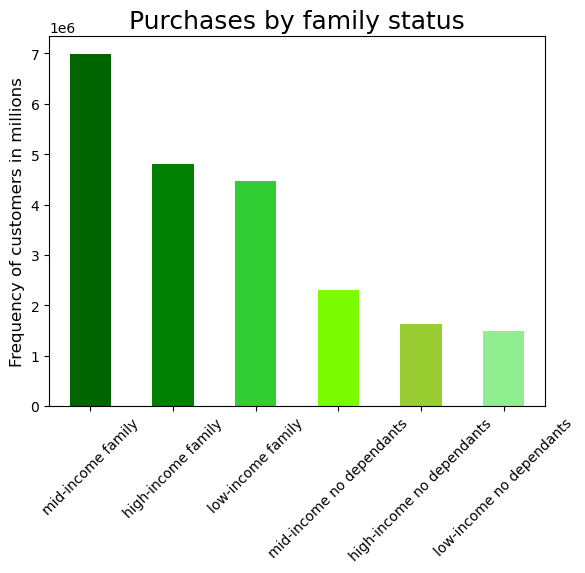

In [112]:
bar_fam_status= df['profile_fam'].value_counts().plot.bar(color = ['darkgreen', 'green', 'limegreen', 'lawngreen', 'yellowgreen', 'lightgreen'])

plt.title("Purchases by family status", fontsize = '18')
plt.ylabel('Frequency of customers in millions', fontsize = 12)
plt.xticks(rotation=45)

**Results:** Married couples with dependants, irrespective of income, account for more purchases than adults with no dependants. 

In [45]:
#checking added column
df.shape

(21695423, 37)

In [46]:
df['dependants_loc'].value_counts(normalize = True)

Has dependants    0.749984
No dependants     0.250016
Name: dependants_loc, dtype: float64

**Results:** we have three times as many customers with dependants as we do without

(array([0, 1]), [Text(0, 0, 'Has dependants'), Text(1, 0, 'No dependants')])

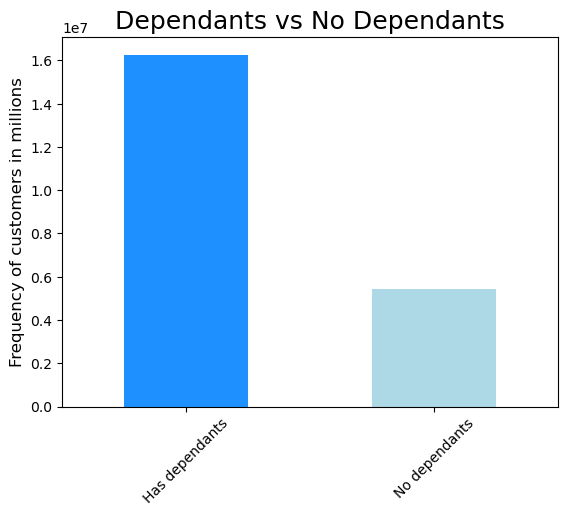

In [47]:
bar_dependants = df['dependants_loc'].value_counts().sort_index().plot.bar(color = ['dodgerblue', 'lightblue'])

plt.title("Dependants vs No Dependants", fontsize = '18')
plt.ylabel('Frequency of customers in millions', fontsize = 12)
plt.xticks(rotation=45)

In [48]:
#exploring relationship between dependants and region
ct_dependants = pd.crosstab(df['region'], df['dependants_loc'], dropna = False)

In [49]:
ct_dependants

dependants_loc,Has dependants,No dependants
region,,
Midwest,3809424,1276895
Northeast,2880137,949948
South,5414530,1809604
West,4167122,1387763


# 3. Customer segmentation by department

Looking at various customer purchasing habits. 

In [50]:
#creating department dictionary
dpt_map = dict(zip(df_deps['department_id'], df_deps['department']))

In [51]:
dpt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [52]:
df['department'] = df['department_id'].map(dpt_map)

In [53]:
df.shape

(21695423, 38)

In [54]:
df['department'].value_counts()

produce            6356499
dairy eggs         3623221
snacks             1935877
beverages          1800905
frozen             1485678
pantry             1247148
bakery              784668
canned goods        708893
deli                702908
dry goods pasta     575190
household           489922
meat seafood        472523
breakfast           469325
personal care       297068
babies              287514
international       179180
alcohol             101091
pets                 64833
missing              45294
other                24116
bulk                 23422
Name: department, dtype: int64

### 3.1 Alcohol drinkers

In [55]:
#creating non-alcohol drinker column

df.loc[df['department'] !='alcohol', 'alcohol_drinker'] = 'No'
df.loc[df['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [56]:
df['alcohol_drinker'].value_counts(dropna = False)

No     21594332
Yes      101091
Name: alcohol_drinker, dtype: int64

In [57]:
#checking output of df
df.shape

(21695423, 39)

Text(0.5, 1.0, 'Distribution of alcohol-drinkers ')

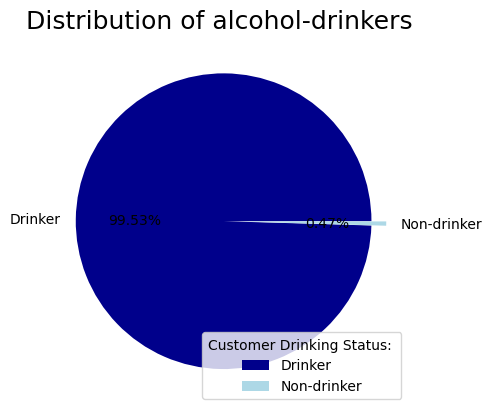

In [58]:
# Drawing a pie chart for alcohol drinking profiling

alcohol_drinker_pie = df['alcohol_drinker'].value_counts().plot.pie(labels = ['Drinker','Non-drinker'], autopct=('%.2f%%'), colors = ['darkblue', 'lightblue'], label = '', explode = [0,0.1])
alcohol_drinker_pie.legend(title = 'Customer Drinking Status: ', loc = 'lower right')
plt.title("Distribution of alcohol-drinkers ", fontsize = '18')


### 3.2 Pet owners

In [121]:
# Creating pet_owner column

df.loc[df['department'] == 'pets', 'pet_owner'] = 'Yes'
df.loc[df['department'] != 'pets', 'pet_owner'] = 'No'

In [122]:
df.shape

(21695423, 41)

In [125]:
df['pet_owner'].value_counts()

No     21630590
Yes       64833
Name: pet_owner, dtype: int64

Text(0.5, 1.0, 'Distribution of Pet-owners ')

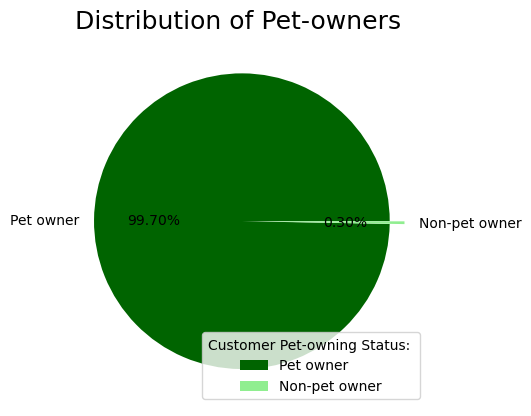

In [124]:
# Drawing a pie chart for pet owners drinking profiling

pie_pet_owner = df['pet_owner'].value_counts().plot.pie(labels = ['Pet owner','Non-pet owner'], autopct=('%.2f%%'), colors = ['darkgreen', 'lightgreen'], label = '', explode = [0,0.1])
pie_pet_owner.legend(title = 'Customer Pet-owning Status: ', loc = 'lower right')
plt.title("Distribution of Pet-owners ", fontsize = '18')

### 3.3 Time of day ordered

In [62]:
#distribution of orders within 24 hours day

df['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      145907
1       76588
2       46102
3       34180
4       35522
5       59204
6      196979
7      604708
8     1162853
9     1655785
10    1857772
11    1831951
12    1749993
13    1778737
14    1799107
15    1776245
16    1690245
17    1388555
18    1086347
19     836994
20     652652
21     535339
22     424695
23     268963
Name: order_hour_of_day, dtype: int64

**Observations:** Unsurprisingly, the most popular hours of the day for purchases are within the typical working day, 9 - 6, although there are also some strong sales before 9 and in the evening.

In [85]:
#create list for new order_time_day column
result = []

for hour in df['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23]:
        result.append('Night owl')
    elif hour in [5, 6, 7, 8]:
        result.append('Early bird')
    else:
        result.append('Regular')

In [86]:
result

['Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regul

In [90]:
df['order_time_period'] = result

In [91]:
#print the frequency of the new column
df['order_time_period'].value_counts(dropna = False)

Regular       14139835
Night owl      5531844
Early bird     2023744
Name: order_time_period, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21695423 entries, 1 to 32435058
Data columns (total 43 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int16         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   _merge                  category      
 10  product_name            object        
 11  aisle_id                float16       
 12  department_id           float16       
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int8          
 18  

In [95]:
df['order_time_period'].value_counts(dropna = False, normalize = True)

Regular       0.651743
Night owl     0.254977
Early bird    0.093280
Name: order_time_period, dtype: float64

**Results:** 65% of purchases fall within regular hours, i.e., 9am until 6pm, 25% of purchases are made in the evening, from 6pm until 5 in the morning, and just over 9% of purchases fall within the early morning, 5am until 9am. 

(array([0, 1, 2]),
 [Text(0, 0, 'Regular'), Text(1, 0, 'Night owl'), Text(2, 0, 'Early bird')])

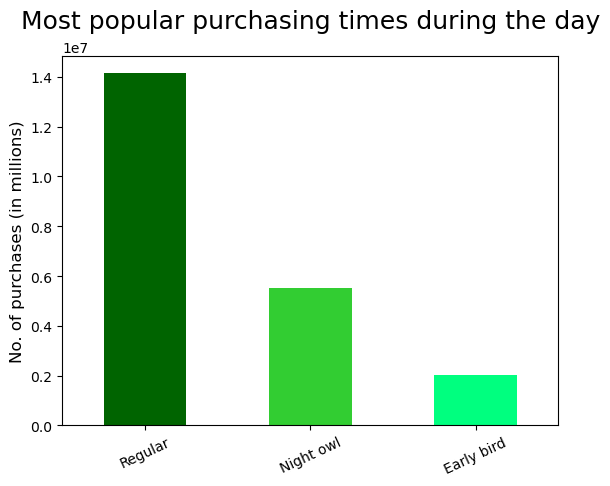

In [97]:
#creating a bar chart for order habit column
bar_loyalty = df['order_time_period'].value_counts().plot.bar(color = ['darkgreen', 'limegreen', 'springgreen'])
plt.title('Most popular purchasing times during the day', fontsize = 18, pad=20)
plt.ylabel('No. of purchases (in millions)', fontsize = 12)
plt.xticks(rotation=25)

### 3.4 Age and order day of week

In [115]:
#customer comparison by age & day of week
crosstab_age_day = pd.crosstab(df['age_category'], df['orders_day_of_week'], dropna = False)

In [118]:
crosstab_age_day

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle age,1611284,1480240,1108838,1002287,991218,1104370,1180464
Senior,1097195,993083,746536,685670,670180,746877,802745
Youth,1430752,1319100,964670,882693,878510,974926,1023785


In [119]:
#customer comparison by age & day of week
crosstab_age_day2 = pd.crosstab(df['age_category'], df['orders_day_of_week'], dropna = False, normalize = 'index')

In [120]:
crosstab_age_day2

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle age,0.190039,0.174583,0.130779,0.118212,0.116907,0.130252,0.139227
Senior,0.191073,0.172942,0.130007,0.119407,0.116710,0.130066,0.139795
Youth,0.191419,0.176482,0.129063,0.118095,0.117535,0.130435,0.136972


Text(0.5, 0, 'Age Group')

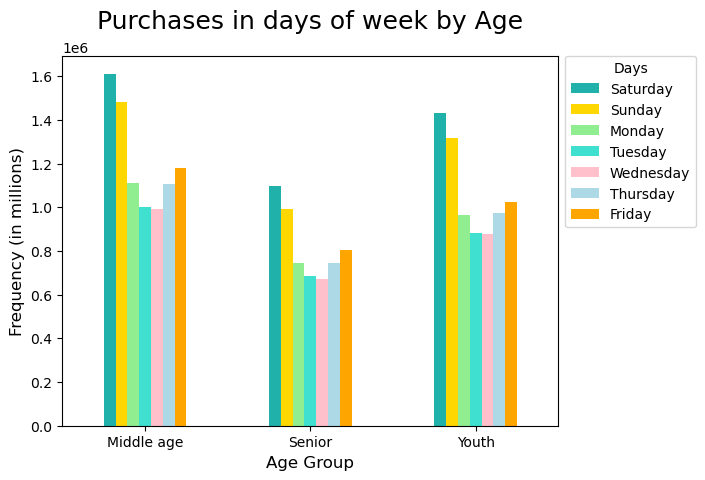

In [116]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'lightgreen', 'turquoise', 'pink', 'lightblue', 'orange'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases in days of week by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

#### 3.5. Region and hour of day 

In [98]:
#customer comparison by region & order hour of day 

crosstab_age_hour = pd.crosstab(df['age_category'], df['order_time_period'], dropna = False)

Text(0.5, 0, 'Age Group')

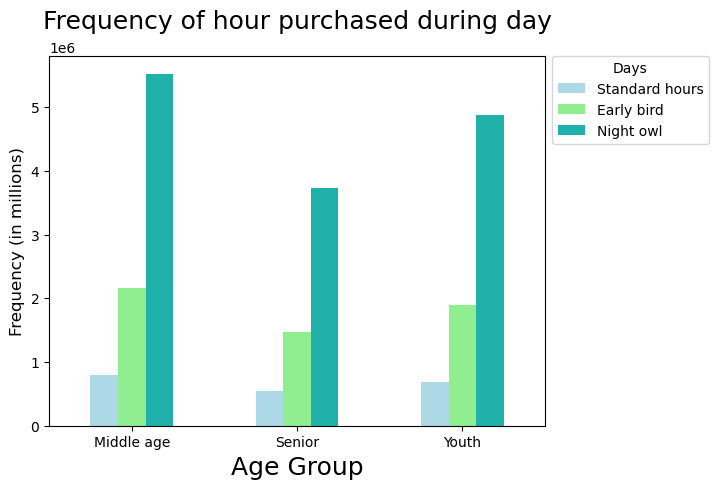

In [106]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_hour.plot(kind = 'bar', rot = 0, color= ['lightblue', 'lightgreen', 'lightseagreen'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Standard hours', 'Early bird', 'Night owl'])
plt.title('Frequency of hour purchased during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 18)

#### Removing two columns which are no longer needed now that 'order_time_period' has been created

In [102]:
df = df.drop('order_time_habit', axis=1)

In [103]:
df = df.drop('order_time_period2', axis=1)

*Checking dataframe size and datatypes*

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21695423 entries, 1 to 32435058
Data columns (total 41 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int16         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   _merge                  category      
 10  product_name            object        
 11  aisle_id                float16       
 12  department_id           float16       
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int8          
 18  

# 5. Exporting Dataframe and Visualisations

#### Dataframe

In [105]:
df.to_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'final_project.pkl'))

#### Visualisations

In [72]:
hist_income.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_income.02.png'))

In [113]:
bar_fam_status.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_fam_status.02.png'))

In [114]:
bar_dependants.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_dependants.02.png'))

In [75]:
alcohol_drinker_pie.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'alc_pie.02.png'))

In [117]:
bar_age_day.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_age_day.02.png'))

In [107]:
bar_day_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_age_hod.02.png'))

In [108]:
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_loyalty.02.png'))

In [126]:
pie_pet_owner.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'pie_pet.02.png'))